# This is where we use the Algorithms

In [1]:
# TODO: Write a guide on what you need, https://anaconda.org/anaconda/gensim <---- Gensim
#       What does the error message mean?

import pandas as pd              # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np               # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

### Algorithms ###
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import train_test_split # Used to split data into Training set and Test Set

C:\Users\vikander\AppData\Local\Continuum\Anaconda33\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading Files

In [2]:
# Load the post data
df = pd.read_csv("../alteredData10k.csv")
#df = pd.read_csv("../alteredData100k.csv")
#df = pd.read_csv("../alteredData1M.csv")
#df1 = pd.read_csv("../data.csv")

## Preprocessing with a Custom Dummy Encoding

In [3]:
# http://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python <--- This is dank stuff

#TODO:
# Concider changing this to Word Embedding instead (Gensim)
# Concider to add new information instead of re-reading everything
# Should be saved into three different file?

#from sklearn.feature_extraction import DictVectorizer
#dictVector = DictVectorizer(sparse = False, sort = False)
#qualitative_features = ['Name', 'Street', 'City']
#X_qual = dictVector.fit_transform(df[qualitative_features].to_dict('records'))
# Print the List
#dictVector.vocabulary_

In [4]:
# Sanity Check
#df.ix[[0, 33, 39, 55]]

In [5]:
# Debug #
#df.loc[df['Name'] == 7]
#df1.head()

In [6]:
#df.head()

In [7]:
# Change all missing values to 'missing'

df['Name']     = df['Name'].fillna('missing')
df['Street']   = df['Street'].fillna('missing')
df['StreetNr'] = df['StreetNr'].fillna(-1)
df['Zip Code'] = df['Zip Code'].fillna(-1)
df['City']     = df['City'].fillna('missing')
df.loc[df['Legitimate'] == False]

,Name,Street,StreetNr,Zip Code,City,Legitimate
19,Verda Faris,Pilgatan,165,6513.0,Kalrlstad,False
26,Gaynell Pascarelli,Bohusgatan,88,4114.0,Goteborg,False
32,Gladis Dunlap,Larmtorget,111,-1.0,Stockholm,False
47,Ross Bell,missing,102,72176.0,Vasteras,False
55,Jeanmarie Westover,Eriksberg,109,-1.0,Uppsala,False
57,Maryland Kraushaar,Fotstigen,146,5516.0,Jonkoping,False
60,Adrien Emerson,Berg,183,-1.0,Sundsvall,False
68,missing,Eriksberg,4,-1.0,Vasteras,False
104,Gladis Dunlap,Allhelgonagatan,23,4112.0,Goteborg,False
107,Cleo Kent,missing,29,11177.0,Stockholm,False


In [8]:
#Check for null values
df.isnull().values.any()

False

In [9]:
# Shows the RowsxColumns
df.shape

(10000, 6)

In [10]:
# This is a simple encoder which replaces Strings with a number

# TODO:
# Should save the corresponding number to the corresponding string in a file

# Thanks to Wboy, for the Dummy Encoding function, http://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

from sklearn.preprocessing import LabelEncoder

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+ feature)
        return df
    
dummyEncode(df)


# Chane True/False to 1/0
correctAdress = {True : 1, False : 0}
df['Legitimate'] = df['Legitimate'].map(correctAdress)

df.select_dtypes

df.head()

,Name,Street,StreetNr,Zip Code,City,Legitimate
0,46,39,2,90198.0,17,1
1,43,10,62,72125.0,19,1
2,4,39,165,58198.0,9,1
3,46,42,65,80137.0,2,1
4,100,38,195,11187.0,15,1


### Check True/False Ratio

In [11]:
num_true = len(df.loc[df['Legitimate'] == True])
num_false = len(df.loc[df['Legitimate'] == False])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of True cases: 9275 (92.75%)
Number of False cases: 725 (7.25%)


### Split Data

In [12]:
# Divides the Train data and Test data into a 70/30 split

#X_train = pd.get_dummies(df)
#X_test = pd.get_dummies(df)

feature_col_names = ['Name', 'City', 'Street', 'StreetNr', 'Zip Code']
prediction_class_name = ['Legitimate']

#ddf = pd.get_dummies(df)

X = df[feature_col_names].values     # predictor feature columnd (8 X m)
y = df[prediction_class_name].values # predicted calss (1 = true, 0 = false) column (1 X m)
split_test_size = 0.90

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42) # 42 is the answer to everything

In [13]:
#Print to check if the split was to our liking

print("{0:0.2f}% in training set".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

10.00% in training set
90.00% in test set


### Verifying predicted value was split correctly

In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 1]), len(df.loc[df['Legitimate'] == 1]) / len(df.index) * 100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 0]), len(df.loc[df['Legitimate'] == 0]) / len(df.index) * 100))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) / len(y_train) * 100))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) / len(y_train) * 100))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) / len(y_test) * 100))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) / len(y_test) * 100))

Original True  : 9275 (92.75%)
Original False : 725 (7.25%)

Training True  : 924 (92.40%)
Training False : 76 (7.60%)

Test True      : 8351 (92.79%)
Test False     : 649 (7.21%)


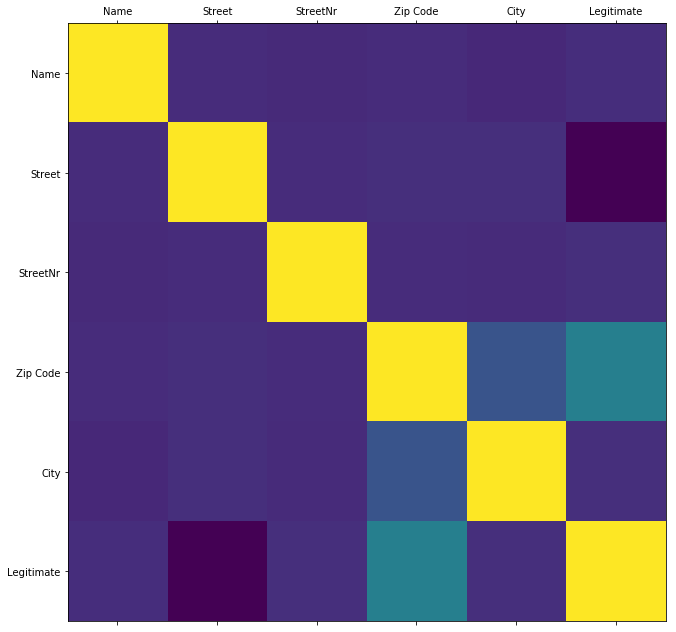

In [15]:
def plot_corr(df, size=11):
    # data frame correlation function
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    
    # color code the rectangles by correlation value
    ax.matshow(corr)
    
    # draw x tick marks
    plt.xticks(range(len(corr.columns)), corr.columns)
    # draw y tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

In [16]:
df.corr()

,Name,Street,StreetNr,Zip Code,City,Legitimate
Name,1.000000,-0.001675,-0.011159,-0.002963,-0.015566,0.000075
Street,-0.001675,1.000000,-0.000605,0.007582,0.006783,-0.148120
StreetNr,-0.011159,-0.000605,1.000000,-0.003954,-0.007574,0.004780
Zip Code,-0.002963,0.007582,-0.003954,1.000000,0.149471,0.346892
City,-0.015566,0.006783,-0.007574,0.149471,1.000000,0.004948
Legitimate,0.000075,-0.148120,0.004780,0.346892,0.004948,1.000000


## Random Forest Test

In [17]:
from sklearn import metrics

rf_model = RandomForestClassifier(random_state = 42) # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [18]:
rf_predict_train = rf_model.predict(X_train)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy 1.0000


In [19]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy 0.9993


In [20]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))


#[[True-Positive, False-Negative]
#[False-Positive, True-Negative]]

Confusion Matrix
[[8351    0]
 [   6  643]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      8351
          0       1.00      0.99      1.00       649

avg / total       1.00      1.00      1.00      9000



## Naive Bayers

In [21]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test  = fill_0.fit_transform(X_test)

In [22]:
# Training Bayers

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [23]:
# Performance on Training Data
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.9270



In [24]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# trainint metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.9317



In [25]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[8351    0]
 [ 615   34]]

Classification Report
             precision    recall  f1-score   support

          1       0.93      1.00      0.96      8351
          0       1.00      0.05      0.10       649

avg / total       0.94      0.93      0.90      9000



### Logistic Regression

In [26]:
lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr_predict_train = lr_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print("")

Accuracy: 0.9340



In [28]:
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("")

Accuracy: 0.9432



In [29]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

Confusion Matrix
[[8349    2]
 [ 509  140]]

Classification Report
             precision    recall  f1-score   support

          1       0.94      1.00      0.97      8351
          0       0.99      0.22      0.35       649

avg / total       0.95      0.94      0.93      9000



### Logistic CV

In [30]:
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = True)
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [31]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print("")

Accuracy: 0.9360



In [32]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("")

Accuracy: 0.9426



In [33]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels = [1, 0]))

Confusion Matrix
[[8349    2]
 [ 515  134]]

Classification Report
             precision    recall  f1-score   support

          1       0.94      1.00      0.97      8351
          0       0.99      0.21      0.34       649

avg / total       0.95      0.94      0.92      9000

